In [2]:
import pandas as pd
df = pd.read_csv('customer_churn.csv')
df

,CustomerID,Tenure,MonthlyCharges,TotalCharges,Contract,PaymentMethod,PaperlessBilling,SeniorCitizen,Churn
0,C00001,6,64,1540,One year,Credit Card,No,1,0
1,C00002,21,113,1753,Month-to-month,Electronic Check,Yes,1,0
2,C00003,27,31,1455,Two year,Credit Card,No,1,0
3,C00004,53,29,7150,Month-to-month,Electronic Check,No,1,0
4,C00005,16,185,1023,One year,Electronic Check,No,1,0
...,...,...,...,...,...,...,...,...,...
495,C00496,50,128,6970,Month-to-month,Credit Card,Yes,1,0
496,C00497,2,49,5917,Two year,Bank Transfer,No,1,0
497,C00498,46,198,2158,Month-to-month,Bank Transfer,No,0,0
498,C00499,1,185,5755,Two year,Credit Card,Yes,1,1


In [5]:
df.clean = df.drop_duplicates()

In [4]:
df.clean.to_csv("cleaned customer_churn.csv", index=False)
df

,CustomerID,Tenure,MonthlyCharges,TotalCharges,Contract,PaymentMethod,PaperlessBilling,SeniorCitizen,Churn
0,C00001,6,64,1540,One year,Credit Card,No,1,0
1,C00002,21,113,1753,Month-to-month,Electronic Check,Yes,1,0
2,C00003,27,31,1455,Two year,Credit Card,No,1,0
3,C00004,53,29,7150,Month-to-month,Electronic Check,No,1,0
4,C00005,16,185,1023,One year,Electronic Check,No,1,0
...,...,...,...,...,...,...,...,...,...
495,C00496,50,128,6970,Month-to-month,Credit Card,Yes,1,0
496,C00497,2,49,5917,Two year,Bank Transfer,No,1,0
497,C00498,46,198,2158,Month-to-month,Bank Transfer,No,0,0
498,C00499,1,185,5755,Two year,Credit Card,Yes,1,1


In [7]:
df.info()
df.isnull().sum()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CustomerID        500 non-null    object
 1   Tenure            500 non-null    int64 
 2   MonthlyCharges    500 non-null    int64 
 3   TotalCharges      500 non-null    int64 
 4   Contract          500 non-null    object
 5   PaymentMethod     500 non-null    object
 6   PaperlessBilling  500 non-null    object
 7   SeniorCitizen     500 non-null    int64 
 8   Churn             500 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 35.3+ KB


,Tenure,MonthlyCharges,TotalCharges,SeniorCitizen,Churn
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,36.532000,113.636000,4237.882000,0.498000,0.106000
std,20.667057,51.799903,2260.619837,0.500497,0.308146
min,1.000000,20.000000,159.000000,0.000000,0.000000
25%,19.000000,67.000000,2237.250000,0.000000,0.000000
50%,37.000000,115.000000,4182.500000,0.000000,0.000000
75%,54.000000,158.000000,6266.750000,1.000000,0.000000
max,71.000000,199.000000,7992.000000,1.000000,1.000000


In [8]:
df["AvgChargesPerMonth"] = df["TotalCharges"] / df["Tenure"]
df["LifetimeValue"] = df["MonthlyCharges"] * df["Tenure"]
df

,CustomerID,Tenure,MonthlyCharges,TotalCharges,Contract,PaymentMethod,PaperlessBilling,SeniorCitizen,Churn,AvgChargesPerMonth,LifetimeValue
0,C00001,6,64,1540,One year,Credit Card,No,1,0,256.666667,384
1,C00002,21,113,1753,Month-to-month,Electronic Check,Yes,1,0,83.476190,2373
2,C00003,27,31,1455,Two year,Credit Card,No,1,0,53.888889,837
3,C00004,53,29,7150,Month-to-month,Electronic Check,No,1,0,134.905660,1537
4,C00005,16,185,1023,One year,Electronic Check,No,1,0,63.937500,2960
...,...,...,...,...,...,...,...,...,...,...,...
495,C00496,50,128,6970,Month-to-month,Credit Card,Yes,1,0,139.400000,6400
496,C00497,2,49,5917,Two year,Bank Transfer,No,1,0,2958.500000,98
497,C00498,46,198,2158,Month-to-month,Bank Transfer,No,0,0,46.913043,9108
498,C00499,1,185,5755,Two year,Credit Card,Yes,1,1,5755.000000,185


<Axes: xlabel='Churn', ylabel='count'>

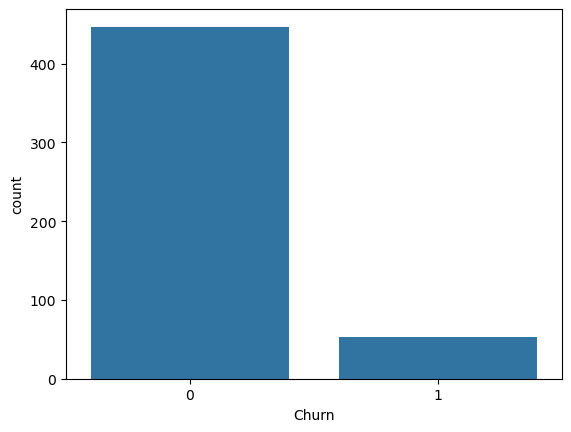

In [6]:
import seaborn as sns
sns.countplot(x='Churn', data=df)

<Axes: xlabel='Contract', ylabel='count'>

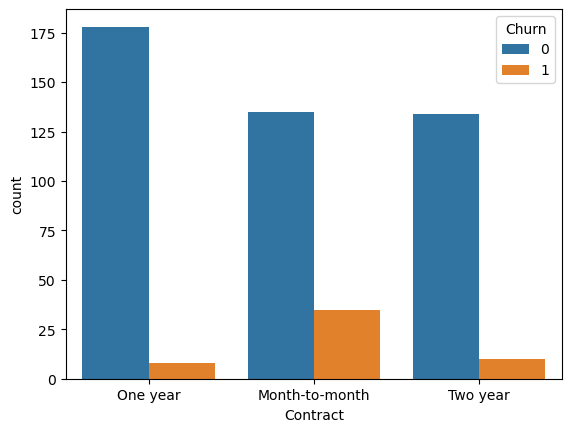

In [7]:
sns.countplot(x='Contract', hue='Churn', data=df)

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

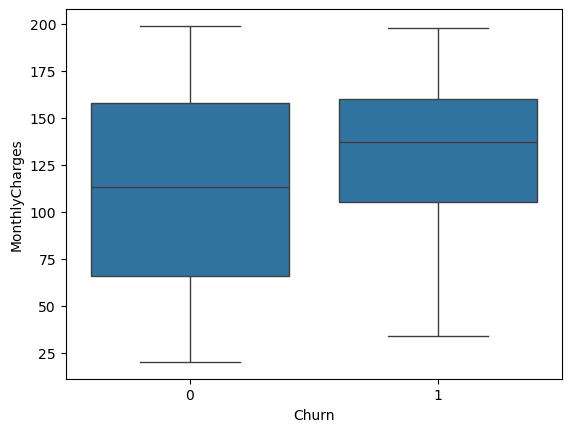

In [8]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)

<Axes: xlabel='Tenure', ylabel='Count'>

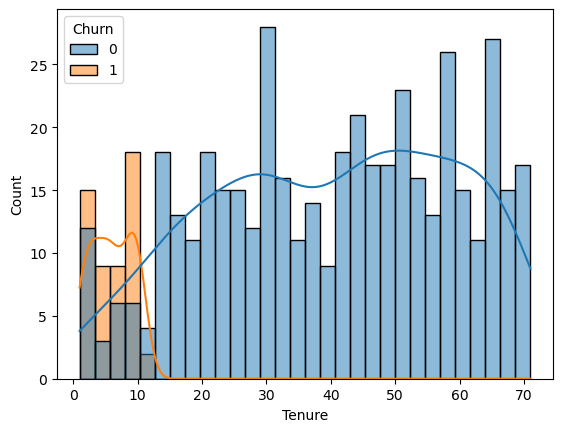

In [12]:
sns.histplot(data=df, x='Tenure', hue='Churn', bins=30, kde=True)

<Axes: >

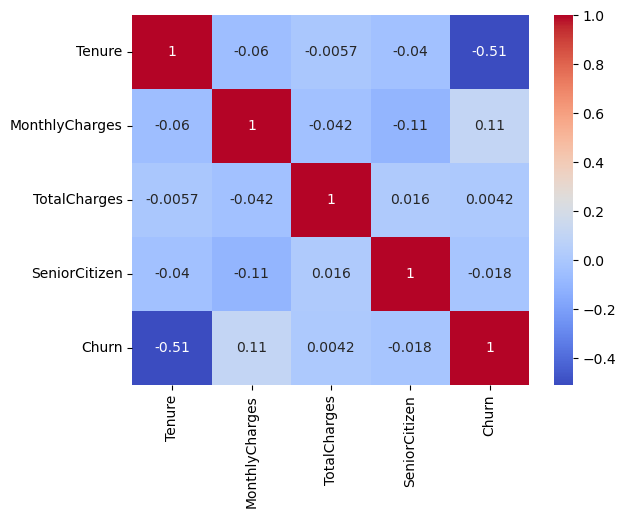

In [10]:
import matplotlib.pyplot as plt
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

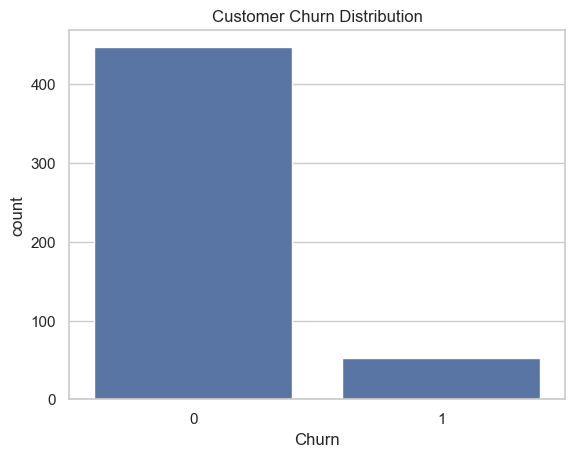

Churn
0    89.4
1    10.6
Name: proportion, dtype: float64

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
sns.countplot(x='Churn', data=df)
plt.title("Customer Churn Distribution")
plt.show()

df['Churn'].value_counts(normalize=True) * 100

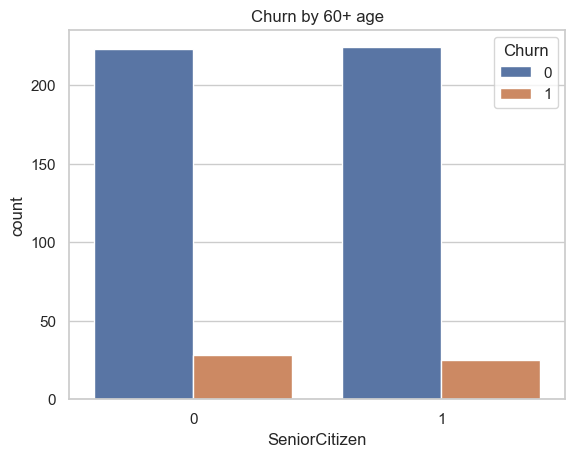

In [16]:
sns.countplot(x= 'SeniorCitizen', hue='Churn', data=df)
plt.title("Churn by 60+ age")
plt.show()

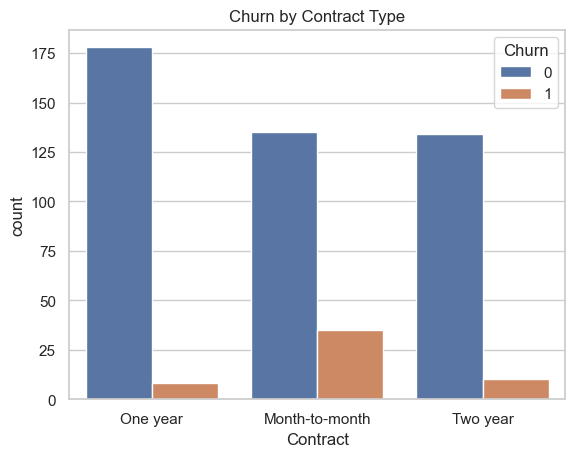

In [17]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Churn by Contract Type")
plt.show()

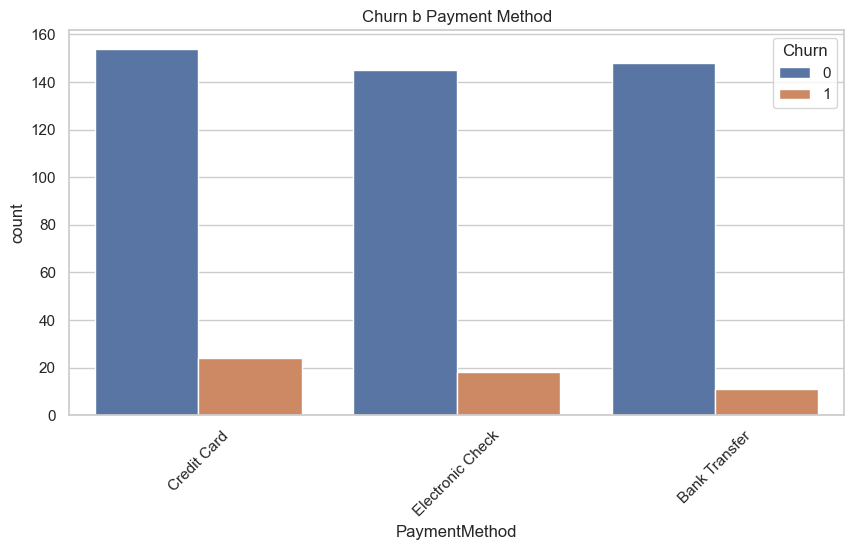

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.xticks(rotation=45)
plt.title("Churn b Payment Method")
plt.show()

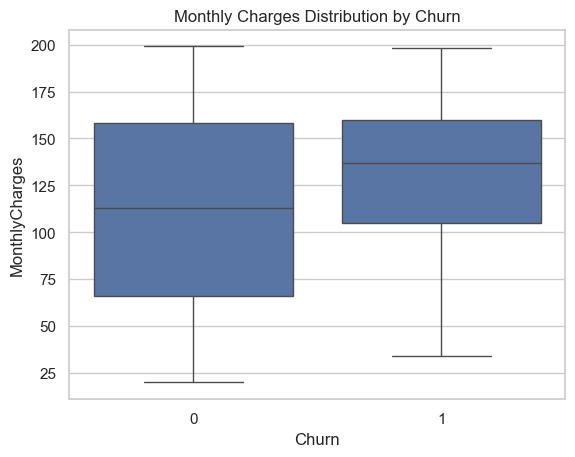

In [19]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges Distribution by Churn")
plt.show()

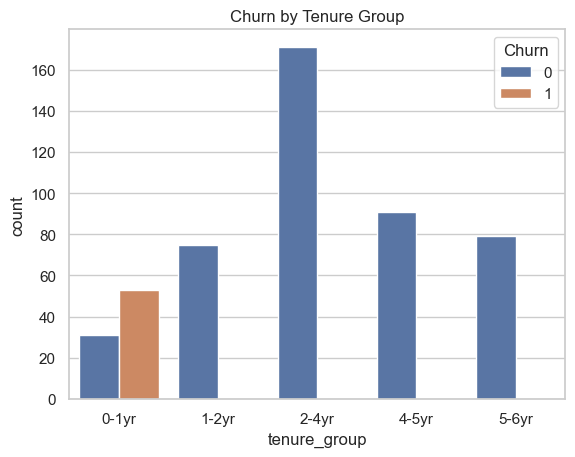

In [24]:
df['tenure_group'] = pd.cut(df['Tenure'],
                            bins=[0,12,24,48,60,72],
                            labels=["0-1yr","1-2yr","2-4yr","4-5yr","5-6yr"])
sns.countplot(x='tenure_group', hue='Churn', data=df)
plt.title("Churn by Tenure Group")
plt.show()

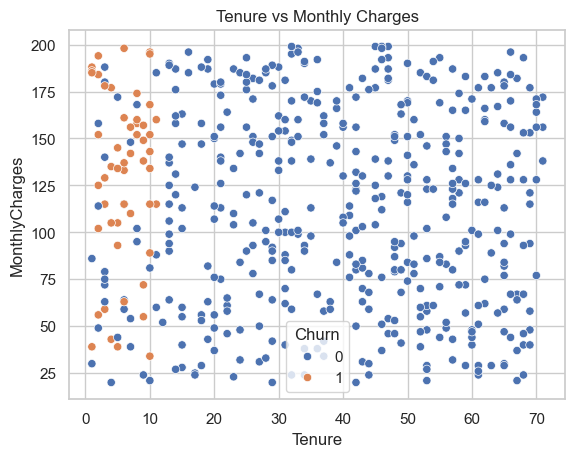

In [26]:
sns.scatterplot(x='Tenure', y='MonthlyCharges', hue='Churn', data=df)
plt.title("Tenure vs Monthly Charges")
plt.show()

In [27]:
#HYPOTHESIS TEST
#H₀: Monthly charges do not affect churn
from scipy.stats import ttest_ind

churn = df[df['Churn']==1]['MonthlyCharges']
no_churn = df[df['Churn']==0]['MonthlyCharges']

ttest_ind(churn, no_churn)

TtestResult(statistic=np.float64(2.4102471700825414), pvalue=np.float64(0.016303157985223953), df=np.float64(498.0))

In [40]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

df = pd.read_csv("cleaned customer_churn.csv")

# Quick check
print(df.head())
print(df.info())

#Descriptive Statistics
print("Summary Statistics:\n")
print(df.describe())
print("\nChurn Rate:")
print(df['Churn'].value_counts(normalize=True) * 100)

#hypothesis test2(Chi-Square (Contract vs Churn))
cont_table = pd.crosstab(df['Contract'], df['Churn'])
chi2, p, dof, expected = stats.chi2_contingency(cont_table)
print("\nChi-square Test")
print("Chi2:", chi2)
print("p-value:", p)

#Hypothesis Test 3 — Correlation (Tenure vs Total Charges)
corr, p_corr = stats.pearsonr(df['Tenure'], df['TotalCharges'])

print("\nCorrelation Test")
print("Correlation:", corr)
print("p-value:", p_corr)

  CustomerID  Tenure  MonthlyCharges  TotalCharges        Contract  \
0     C00001       6              64          1540        One year   
1     C00002      21             113          1753  Month-to-month   
2     C00003      27              31          1455        Two year   
3     C00004      53              29          7150  Month-to-month   
4     C00005      16             185          1023        One year   

      PaymentMethod PaperlessBilling  SeniorCitizen  Churn  
0       Credit Card               No              1      0  
1  Electronic Check              Yes              1      0  
2       Credit Card               No              1      0  
3  Electronic Check               No              1      0  
4  Electronic Check               No              1      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CustomerID  

In [41]:
#Confidence Interval (Monthly Charges)
mean = df['MonthlyCharges'].mean()
std = df['MonthlyCharges'].std()
n = len(df)

margin_error = 1.96 * (std / np.sqrt(n))
lower = mean - margin_error
upper = mean + margin_error

print("\n95% Confidence Interval:", (lower, upper))



95% Confidence Interval: (np.float64(109.09553829893363), np.float64(118.17646170106636))


In [42]:
#ANOVA — Charges Across Contract Types
anova_model = smf.ols('MonthlyCharges ~ C(Contract)', data=df).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)

print("\nANOVA Results")
print(anova_table)


ANOVA Results
                   sum_sq     df         F    PR(>F)
C(Contract)  1.684822e+02    2.0  0.031274  0.969212
Residual     1.338763e+06  497.0       NaN       NaN


In [43]:
#Logistic Regression (Churn Prediction Model)
# Convert categorical variables
df['Contract'] = df['Contract'].astype('category').cat.codes
df['PaymentMethod'] = df['PaymentMethod'].astype('category').cat.codes
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes':1, 'No':0})

X = df[['Tenure', 'MonthlyCharges', 'TotalCharges', 'Contract',
        'PaymentMethod', 'PaperlessBilling', 'SeniorCitizen']]
y = df['Churn']

X = sm.add_constant(X)

logit_model = sm.Logit(y, X).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.098657
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                  500
Model:                          Logit   Df Residuals:                      492
Method:                           MLE   Df Model:                            7
Date:                Fri, 30 Jan 2026   Pseudo R-squ.:                  0.7082
Time:                        11:40:53   Log-Likelihood:                -49.329
converged:                       True   LL-Null:                       -169.03
Covariance Type:            nonrobust   LLR p-value:                 4.955e-48
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.2655      1.115      1.134      0.257      -0.921       3.452
Tenure    

In [44]:
#Model Validation (Accuracy)
pred = logit_model.predict(X)
pred_class = (pred > 0.5).astype(int)

accuracy = (pred_class == y).mean()
print("\nModel Accuracy:", accuracy)


Model Accuracy: 0.96
